In [1]:
#必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
for dirname, _, filenames in os.walk('./titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./titanic/Untitled.ipynb
./titanic/titanic.py
./titanic/.ipynb_checkpoints/Untitled-checkpoint.ipynb
./titanic/data/test.csv
./titanic/data/train.csv
./titanic/data/gender_submission.csv


In [7]:
train = pd.read_csv("./titanic/data/train.csv")
test = pd.read_csv("./titanic/data/test.csv")

In [14]:
#カラムを確認
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [9]:
#基本統計量を確認
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Emir, Mr. Farred Chehab",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Reynolds, Mr. Harold J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [11]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [12]:
#Null数確認
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#Sex別に生存率確認
df = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Sex', 
                  columns='Survived',
                 margins=True)
df['Survived ratio'] = df[1] / df['All']
df

Survived,0,1,All,Survived ratio
Sex,,,,
female,81,233,314,0.742038
male,468,109,577,0.188908
All,549,342,891,0.383838


In [21]:
#SibSp別に生存率確認

df2 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='SibSp', 
                  columns='Survived',
                 margins=True)
df2['Survived ratio'] = df2[1] / df2['All']
df2

Survived,0,1,All,Survived ratio
SibSp,,,,
0,398.0,210.0,608,0.345395
1,97.0,112.0,209,0.535885
2,15.0,13.0,28,0.464286
3,12.0,4.0,16,0.250000
4,15.0,3.0,18,0.166667
5,5.0,NaN,5,NaN
8,7.0,NaN,7,NaN
All,549.0,342.0,891,0.383838


<function matplotlib.pyplot.show(*args, **kw)>

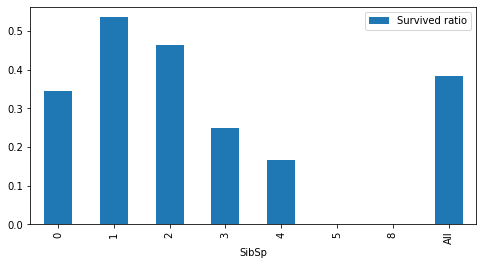

In [23]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df2['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
plt.show

In [24]:
#Parch別に生存率確認
df3 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Parch', 
                  columns='Survived',
                 margins=True)
df3['Survived ratio'] = df3[1] / df3['All']
df3

Survived,0,1,All,Survived ratio
Parch,,,,
0,445.0,233.0,678,0.343658
1,53.0,65.0,118,0.550847
2,40.0,40.0,80,0.500000
3,2.0,3.0,5,0.600000
4,4.0,NaN,4,NaN
5,4.0,1.0,5,0.200000
6,1.0,NaN,1,NaN
All,549.0,342.0,891,0.383838


<function matplotlib.pyplot.show(*args, **kw)>

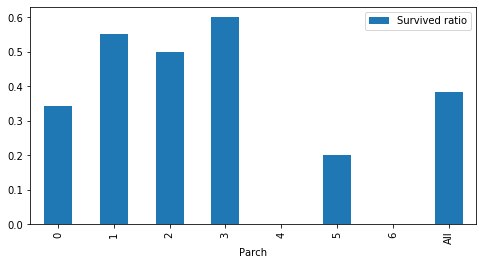

In [25]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df3['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
plt.show

In [26]:
#家族連れの数を計算
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

Survived      0      1  All  Survived ratio
Family                                     
1         374.0  163.0  537        0.303538
2          72.0   89.0  161        0.552795
3          43.0   59.0  102        0.578431
4           8.0   21.0   29        0.724138
5          12.0    3.0   15        0.200000
6          19.0    3.0   22        0.136364
7           8.0    4.0   12        0.333333
8           6.0    NaN    6             NaN
11          7.0    NaN    7             NaN
All       549.0  342.0  891        0.383838 <function show at 0x11a4788c0>


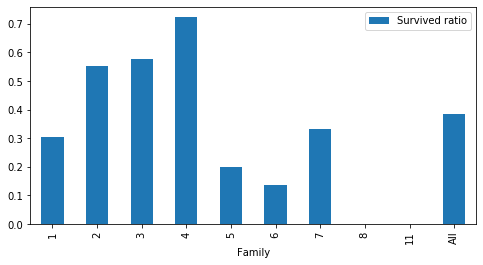

In [30]:
df2 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Family', 
                  columns='Survived',
                 margins=True)
df2['Survived ratio'] = df2[1] / df2['All']

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df2['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))

print(df2, plt.show)

In [31]:
train["IsAlone"] = train.Family.apply(lambda x: 1 if x == 1 else 0)
test["IsAlone"] = test.Family.apply(lambda x: 1 if x == 1 else 0)

In [32]:
df3 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='IsAlone', 
                  columns='Survived',
                 margins=True)
df3['Survived ratio'] = df3[1] / df3['All']
df3

Survived,0,1,All,Survived ratio
IsAlone,,,,
0,175,179,354,0.505650
1,374,163,537,0.303538
All,549,342,891,0.383838


In [34]:
#集計がやりやすいよう、Ageをグルーピング
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', '1-5', '6-12', '13-18', '19-24', '25-35', '36-60', '60-']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

Survived    0    1  All  Survived ratio
AgeGroup                               
Unknown   125   52  177        0.293785
1-5        13   31   44        0.704545
6-12       16    9   25        0.360000
13-18      40   30   70        0.428571
19-24      90   48  138        0.347826
25-35     131   89  220        0.404545
36-60     117   78  195        0.400000
60-        17    5   22        0.227273
All       549  342  891        0.383838 <function show at 0x11a4788c0>


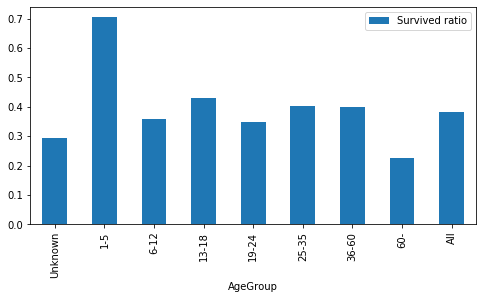

In [35]:
#作成したAgeGroupごとに生存率確認
df4 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='AgeGroup', 
                  columns='Survived',
                 margins=True)
df4['Survived ratio'] = df4[1] / df4['All']

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df4['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))

print(df4, plt.show)

In [36]:
#部屋がある人=1 / 部屋がある人=0となるよう分類
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

In [37]:
#部屋があるなしで生存率確認
df5 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='CabinBool', 
                  columns='Survived',
                 margins=True)
df5['Survived ratio'] = df5[1] / df5['All']
df5

Survived,0,1,All,Survived ratio
CabinBool,,,,
0,481,206,687,0.299854
1,68,136,204,0.666667
All,549,342,891,0.383838


In [38]:
#Cabin内のアルファベットを抽出
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Deck']=train['Cabin'].str.get(0)
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['Deck']=test['Cabin'].str.get(0)

Survived      0      1  All  Survived ratio
Deck                                       
A           8.0    7.0   15        0.466667
B          12.0   35.0   47        0.744681
C          24.0   35.0   59        0.593220
D           8.0   25.0   33        0.757576
E           8.0   24.0   32        0.750000
F           5.0    8.0   13        0.615385
G           2.0    2.0    4        0.500000
T           1.0    NaN    1             NaN
U         481.0  206.0  687        0.299854
All       549.0  342.0  891        0.383838 AxesSubplot(0.125,0.125;0.775x0.755)


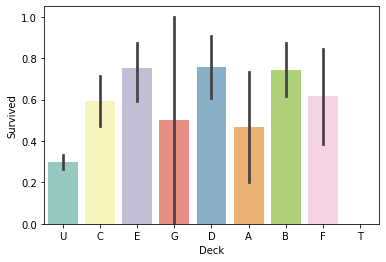

In [39]:
df6 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Deck', 
                  columns='Survived',
                 margins=True)
df6['Survived ratio'] = df6[1] / df6['All']

print(df6, sns.barplot(x="Deck", y="Survived", data=train, palette='Set3'))

In [40]:
#集計のためFareをグルーピング
test["Fare"] = test["Fare"].fillna(-2.0)
bins = [-10, -1, 1, 8, 14, 31, np.inf]
labels = ['Unknown', '0-1', '2-8', '9-14', '15-31', '31-']
train['FareGroup'] = pd.cut(train["Fare"], bins, labels = labels)
test['FareGroup'] = pd.cut(test["Fare"], bins, labels = labels)

Survived     0    1  All  Survived ratio
FareGroup                               
0-1         14    1   15        0.066667
2-8        175   51  226        0.225664
9-14       137   59  196        0.301020
15-31      130  102  232        0.439655
31-         93  129  222        0.581081
All        549  342  891        0.383838 <function show at 0x11a4788c0>


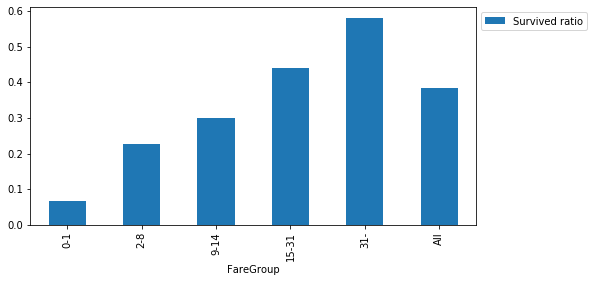

In [41]:
#FareGroupごとに生存率確認
df7 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='FareGroup', 
                  columns='Survived',
                 margins=True)
df7['Survived ratio'] = df7[1] / df7['All']

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df7['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))

print(df7, plt.show)

Survived    0    1  All  Survived ratio
Embarked                               
C          75   93  168        0.553571
Q          47   30   77        0.389610
S         427  217  644        0.336957
All       549  340  889        0.382452 AxesSubplot(0.125,0.125;0.775x0.755)


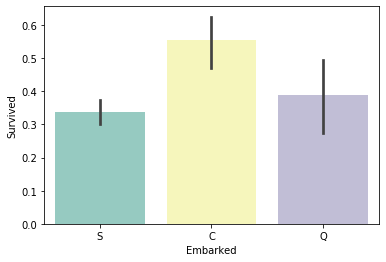

In [42]:
#Embarkedごとに生存率確認
df8 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Embarked', 
                  columns='Survived',
                 margins=True)
df8['Survived ratio'] = df8[1]/ df8['All']

print(df8, sns.barplot(x="Embarked", y="Survived", data=train, palette='Set3'))

In [43]:
#NameからTitleを抽出
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [44]:
#表記ゆれを修正
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Survived    0    1  All  Survived ratio
Title                                  
Master     17   23   40        0.575000
Miss       55  130  185        0.702703
Mr        436   81  517        0.156673
Mrs        26  100  126        0.793651
Other      15    8   23        0.347826
All       549  342  891        0.383838 AxesSubplot(0.125,0.125;0.775x0.755)


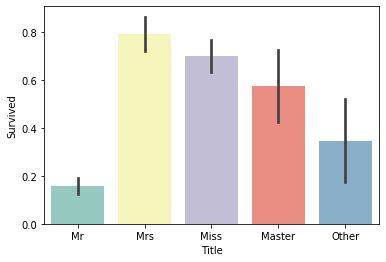

In [45]:
#Ticket_Lettごとに生存率確認
df9 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Title', 
                  columns='Survived',
                 margins=True)
df9['Survived ratio'] = df9[1] / df9['All']
    
print(df9, sns.barplot(x="Title", y="Survived", data=train, palette='Set3'))

In [46]:
#Ticket内のアルファベット、長さを抽出
for dataset in combine: 
        dataset['Ticket_Lett'] = dataset['Ticket'].apply(lambda x: str(x)[0])
        dataset['Ticket_Lett'] = dataset['Ticket_Lett'].apply(lambda x: str(x)) 
        dataset['Ticket_Lett'] = np.where((dataset['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), dataset['Ticket_Lett'], np.where((dataset['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        dataset['Ticket_Len'] = dataset['Ticket'].apply(lambda x: len(x)) 

Survived       0    1  All  Survived ratio
Ticket_Lett                               
0             43   12   55        0.218182
1             54   92  146        0.630137
2             98   85  183        0.464481
3            229   72  301        0.239203
A             27    2   29        0.068966
C             31   16   47        0.340426
P             23   42   65        0.646154
S             44   21   65        0.323077
All          549  342  891        0.383838 AxesSubplot(0.125,0.125;0.775x0.755)


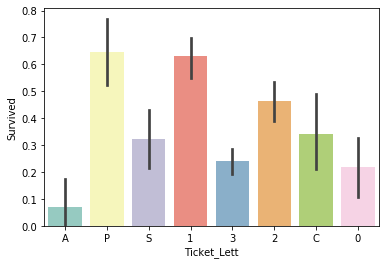

In [49]:
#Ticket_Lettごとに生存率確認
df10 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Ticket_Lett', 
                  columns='Survived',
                 margins=True)
df10['Survived ratio'] = df10[1] / df10['All']

print(df10, sns.barplot(x="Ticket_Lett", y="Survived", data=train, palette='Set3'))

Survived        0      1  All  Survived ratio
Ticket_Len                                   
3             2.0    NaN    2             NaN
4            64.0   37.0  101        0.366337
5            50.0   81.0  131        0.618321
6           285.0  134.0  419        0.319809
7            19.0    8.0   27        0.296296
8            35.0   41.0   76        0.539474
9            21.0    5.0   26        0.192308
10           27.0   14.0   41        0.341463
11            6.0    2.0    8        0.250000
12            6.0    4.0   10        0.400000
13            6.0    4.0   10        0.400000
15            6.0    3.0    9        0.333333
16            8.0    3.0   11        0.272727
17            8.0    6.0   14        0.428571
18            6.0    NaN    6             NaN
All         549.0  342.0  891        0.383838 <function show at 0x11a4788c0>


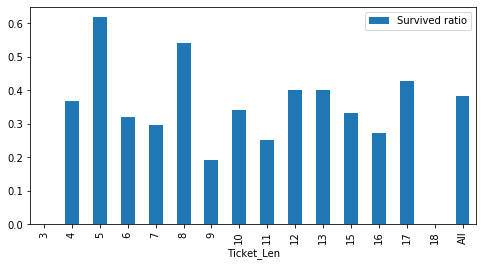

In [50]:
#Ticket_Letnごとに生存率確認
df11 = train.pivot_table('PassengerId', 
                  aggfunc='count', 
                  index='Ticket_Len', 
                  columns='Survived',
                 margins=True)
df11['Survived ratio'] = df11[1] / df11['All']

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,1,1)
df11['Survived ratio'].plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1, 1))

print(df11, plt.show)

In [51]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
Family         891 non-null int64
IsAlone        891 non-null int64
AgeGroup       891 non-null category
CabinBool      891 non-null int64
Deck           891 non-null object
FareGroup      891 non-null category
Title          891 non-null object
Ticket_Lett    891 non-null object
Ticket_Len     891 non-null int64
dtypes: category(2), float64(2), int64(9), object(8)
memory usage: 134.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

(None, None)

In [52]:
#不要なカラムを削除
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train = train.drop(['SibSp'], axis = 1)
test = test.drop(['SibSp'], axis = 1)

train = train.drop(['Parch'], axis = 1)
test = test.drop(['Parch'], axis = 1)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [53]:
#EmbarkedのNullをSで埋める
train = train.fillna({"Embarked": "S"})

#欠損値をFare=中央値, Age=平均値で埋める
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [54]:
#カテゴリカル変数のエンコード
from sklearn import preprocessing

for column in ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup', 'Deck', 'Ticket_Len', 'Ticket_Lett']:
    le = preprocessing.LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    
for column in ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup', 'Deck', 'Ticket_Len', 'Ticket_Lett']:
    le = preprocessing.LabelEncoder()
    le.fit(test[column])
    test[column] = le.transform(test[column])

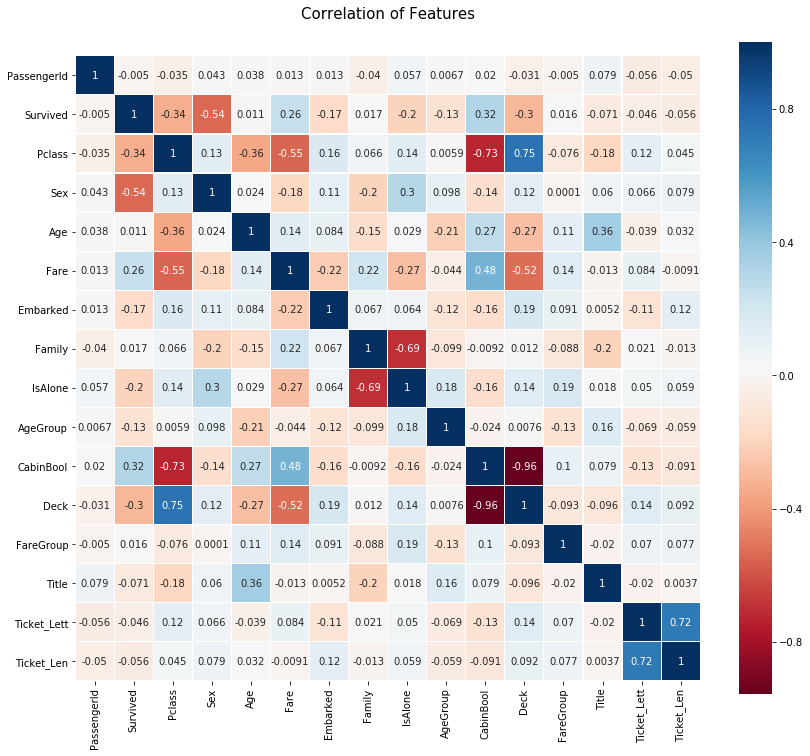

In [55]:
#各変数の相関係数を確認
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [56]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
        'Family', 'IsAlone', 'AgeGroup', 'CabinBool', 'Deck', 'FareGroup',
        'Title', 'Ticket_Lett', 'Ticket_Len'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family',
        'IsAlone', 'AgeGroup', 'CabinBool', 'Deck', 'FareGroup', 'Title',
        'Ticket_Lett', 'Ticket_Len'],
       dtype='object'))